In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 500)

In [5]:
df = pd.read_csv("/Users/hansuho/Desktop/21-1 KNU/학교 수업/마케팅리서치/기말발표/survey_data/폴더블_열이름변경/시트 1-폴더블 아이폰 6조.csv")
df.drop(columns='타임스탬프', inplace=True)
df = df.iloc[:, :-1]    # 휴대폰 번호 열 삭제
df.drop(index=12, inplace=True)    # 샤오미 홍미노트 행 삭제
df.reset_index(inplace=True)
df.drop(columns = 'index', inplace=True)

In [6]:
# 7점 척도 데이터 범주 확인
print(df.iloc[:, 7].unique())
print(df.iloc[:, 12].unique())

['7 (매우 그렇다.)' '4 (보통이다.)' '3' '6' '5' '2']
['7    (매우 그렇다)' '4    (보통이다)' '6' '5' '3' '1    (전혀 그렇지 않다)']


In [7]:
score_dict = {"7 (매우 그렇다.)": 7, "7    (매우 그렇다)": 7,
              "6":6,
              "5":5,
              "4 (보통이다.)":4, "4    (보통이다)":4,
              "3":3,
              "2":2,
              "1 (전혀 그렇지 않다.)":1, "1    (전혀 그렇지 않다)":1}

likert7_cols = df.iloc[:, 6:18].columns.tolist()

for col in likert7_cols:
    tmp = []
    for item in df[col]:
        tmp.append(score_dict[item])
    df[col] = tmp

    
# 애플: 0, 삼성: 1
df['Manufacturer'] = [0 if x == "애플" else 1 for x in df['Manufacturer']]    


# 아이폰 시리즈에 se, xs 포함
for idx, item in enumerate(df['phone_series']):    
    if item == 'apple 아이폰 xs': df.iloc[idx, 3] = "애플 시리즈 (아이폰 12, 11 시리즈 등)"
    elif item == '아이폰se2': df.iloc[idx, 3] = "애플 시리즈 (아이폰 12, 11 시리즈 등)"
        

# 점수 변환
category_dict = {"6개월 미만": 0, '애플 시리즈 (아이폰 12, 11 시리즈 등)': 0, '애플의 폴더블폰': 0, '남성': 0,
               "6개월 ~ 1년 미만": 1, '삼성 폴더블폰 (Z-Fold 시리즈, Z-Flip 시리즈 등)': 1, '매우 불만족': 1,
               '전혀 그렇지 않다.': 1, '구입할 의향이 전혀 없다.': 1, '삼성의 Z-플립': 1, '여성': 1,
                 
               "1년 ~ 1년 6개월 미만": 2, '삼성 갤럭시 시리즈 (S 시리즈, Note 시리즈 등)': 2, '불만족': 2, '그렇지 않다.': 2, '구입할 의향이 없다.': 2,
               "1년 6개월 ~ 2년 미만": 3, 'LG (윙, V, Q 시리즈 등)': 3, '보통': 3, '보통이다.':3,
               "2년 이상": 4, '만족': 4, '그렇다.': 4, '구입할 의향이 있다.': 4,
               '매우 만족': 5, '매우 그렇다.': 5, '구입할 의향이 매우 있다.': 5}

categorical_cols = ['using_period', 'proper_change_period', 'phone_series', 'brand_satisfying', 'fordable_intension',
                    'intension_135', 'intension_155', 'intension_175', 'appford_flip', 'gender']

for col in categorical_cols:
    tmp = []
    for item in df[col]:
        tmp.append(category_dict[item])
    df[col] =tmp


# 디자인 특성 및 브랜드 충성도 평균 점수 산출
df['design_feature'] = round(((df['design_v1'] + df['design_v2'] + df['design_v3'] + df['design_v4'] + df['design_v5'] + df['design_v6']) / 6), 2)
df['brand_loyalty'] = round(((df['loyalty_v1'] + df['loyalty_v2'] + df['loyalty_v3'] + df['loyalty_v4'] + df['loyalty_v5'] + df['loyalty_v6']) / 6), 2)

# 디자인 특성, 브랜드 충성도 하위 질문 
df.drop(columns=['design_v1', 'design_v2', 'design_v3', 'design_v4', 'design_v5', 'design_v6',
                 'loyalty_v1', 'loyalty_v2', 'loyalty_v3', 'loyalty_v4', 'loyalty_v5', 'loyalty_v6'], inplace=True)

# 동일 브랜드 기기 사용 개수 전처리
df.same_brand_item.fillna("0개", inplace=True)
df.same_brand_item = [int(x[:1]) for x in df.same_brand_item]

In [8]:
# df.to_csv("/Users/hansuho/Desktop/21-1 KNU/학교 수업/마케팅리서치/기말발표/폴더블_열이름변경/preprocessed_data.csv", index=False)

In [9]:
df.head(2)

,Manufacturer,using_period,proper_change_period,phone_series,brand_satisfying,satisfying_factor,purchase_reason,same_brand_item,channels,online_channel,online_reason,offline_channel,offline_channel.1,fordable_intension,intension_135,intension_155,intension_175,appford_flip,gender,age,design_feature,brand_loyalty
0,0,1,3,0,5,사용 편의성,주변 IT 기기와의 호환성 (7-1번 질문으로 이동하십시오),4,오프라인 (10번 질문으로 이동하십시오),NaN,NaN,이마트(일렉트로마트),편리성,5,5,4,2,0,0,20대,6.5,7.00
1,0,1,4,0,5,디자인,성능,0,온라인 (9번 질문으로 이동하십시오),중고나라,가격,NaN,NaN,3,1,1,1,0,0,20대,6.5,6.83


In [10]:
# # 독립표본 t-검정
# from scipy import stats

# # 변수 생성
apple = df[df['Manufacturer'] == 0]
samsung = df[df['Manufacturer'] == 1]

apple.reset_index(inplace=True)
apple.drop(columns = 'index', inplace=True)
samsung.reset_index(inplace=True)
samsung.drop(columns = 'index', inplace=True)

# #제조사의 등분산 검정 
# manufacturer_result = stats.levene(apple['brand_loyalty'], samsung['brand_loyalty'])
# print('LeveneResult(F) : %.3f \np-value : %.3f' % (manufacturer_result))

/Users/hansuho/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
# result = stats.ttest_ind(apple['brand_loyalty'], samsung['brand_loyalty'], equal_var=True) 
# print('t statistic : %.3f \np-value : %.3f' % (result))

In [12]:
apple_mean_loyalty = apple['brand_loyalty'].mean()
samsung_mean_loyalty = samsung['brand_loyalty'].mean()

apple_mean_design = apple['design_feature'].mean()
samsung_mean_design = samsung['design_feature'].mean()

print(f"""
Apple 사용자들의 평균 브랜드 충성도: {apple_mean_loyalty}
Samsung 사용자들의 평균 브랜드 충성도: {samsung_mean_loyalty}

Apple 사용자들의 평균 디자인 특성: {apple_mean_design}
Samsung 사용자들의 평균 디자인 특성: {samsung_mean_design}
""")


Apple 사용자들의 평균 브랜드 충성도: 5.495526315789474
Samsung 사용자들의 평균 브랜드 충성도: 5.226428571428571

Apple 사용자들의 평균 디자인 특성: 5.539999999999999
Samsung 사용자들의 평균 디자인 특성: 4.3567857142857145



설문 응답자 전체 단순 구매의도 척도 평균: 2.35
애플 사용자 그룹의 단순 구매의도 척도 평균: 2.58
삼성 사용자 그룹의 단순 구매의도 척도 평균: 2.04


Apple 사용자들의 평균 브랜드 충성도: 5.495526315789474
Samsung 사용자들의 평균 브랜드 충성도: 5.226428571428571



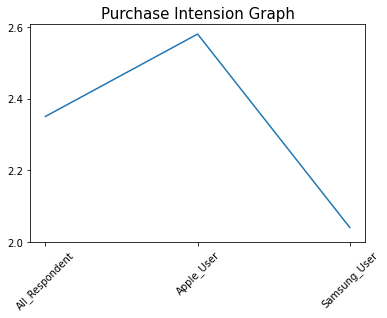

In [13]:
all_respondent_intension_mean = round(df.fordable_intension.mean(), 2)
apple_user_intension_mean = round(df[df["Manufacturer"] == 0].fordable_intension.mean(), 2)
samsung_user_intension_mean = round(df[df["Manufacturer"] == 1].fordable_intension.mean(), 2)

print(f"설문 응답자 전체 단순 구매의도 척도 평균: {all_respondent_intension_mean}")
print(f"애플 사용자 그룹의 단순 구매의도 척도 평균: {apple_user_intension_mean}")
print(f"삼성 사용자 그룹의 단순 구매의도 척도 평균: {samsung_user_intension_mean}")
print()
print(f"""
Apple 사용자들의 평균 브랜드 충성도: {apple_mean_loyalty}
Samsung 사용자들의 평균 브랜드 충성도: {samsung_mean_loyalty}""")
print()

x = ["All_Respondent", "Apple_User", "Samsung_User"]
y = [all_respondent_intension_mean, apple_user_intension_mean, samsung_user_intension_mean]

sns.lineplot(x=x, y=y)
plt.title("Purchase Intension Graph", fontsize=15)
plt.yticks(np.arange(2.0, 2.8, 0.2))
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [14]:
its_df = df[['Manufacturer', 'fordable_intension', 'intension_135', 'intension_155', 'intension_175', 'appford_flip']]

In [15]:
its_df.head()

,Manufacturer,fordable_intension,intension_135,intension_155,intension_175,appford_flip
0,0,5,5,4,2,0
1,0,3,1,1,1,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,0,3,2,2,1,0


In [16]:
its_df_a = its_df[its_df['Manufacturer'] == 0]
its_df_s = its_df[its_df['Manufacturer'] == 1]

In [17]:
import matplotlib.pyplot as plt
import collections

fordable_intension_a = collections.Counter(its_df_a['fordable_intension'])
fordable_intension_s = collections.Counter(its_df_s['fordable_intension'])
fordable_intension_s

Counter({1: 15, 2: 4, 3: 4, 4: 3, 5: 2})

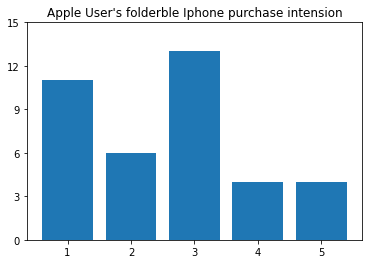

In [18]:
a = np.arange(5)
scale = [1, 2, 3, 4, 5]

value_a = [11, 6, 13, 4, 4]
value_s = [15, 4, 4, 3, 2]

plt.bar(a, value_a)
plt.xticks(a, scale)
plt.yticks(np.arange(0, 16, 3))
plt.title("Apple User's folderble Iphone purchase intension")
plt.show()

# plt.bar(s, value_s)
# plt.xticks(s, scale)
# plt.yticks(np.arange(0, 16, 3))
# plt.title("Samsung User's folderble Iphone purchase intension")
# plt.show()

In [19]:
intension_a_175 = collections.Counter(its_df_a['intension_175'])
intension_s_175 = collections.Counter(its_df_s['intension_175'])
intension_a_175, intension_s_175

(Counter({2: 2, 1: 30, 3: 6}), Counter({1: 23, 2: 3, 5: 2}))

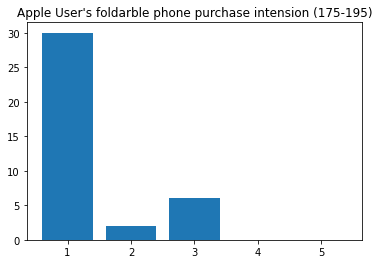

In [20]:
a = np.arange(5)
value_a = [30, 2, 6, 0, 0]
scale_a = [1, 2, 3, 4, 5]


plt.bar(a, value_a)
plt.xticks(a, scale_a)
plt.yticks(np.arange(0, 31, 5))
plt.title("Apple User's foldarble phone purchase intension (175-195)")
plt.show()

In [21]:
offline_reasons = collections.Counter(df['offline_channel.1'])
online_reasons = collections.Counter(df['online_reason'])
offline_reasons, online_reasons

(Counter({'편리성': 18,
          nan: 17,
          '제품 실물을 확인하기 위해서': 13,
          '구매 보조금': 11,
          '가격을 더깍을수있어서': 1,
          '개인사정': 1,
          '아버지가 직원이셔서..': 1,
          '얼떨결에...': 1,
          '사은품': 2,
          '싼 가격': 1}),
 Counter({nan: 46,
          '가격': 1,
          '자급제 사용을 위해서': 9,
          '편리성': 4,
          '온라인 사전예약을 위해서 (9번 질문으로 이동하십시오)': 1,
          '온라인 사전예약을 위해서': 4,
          '가격할인': 1}))

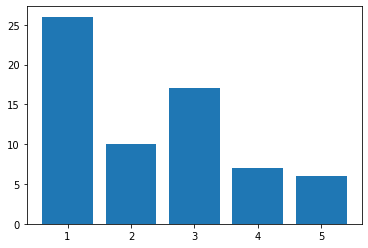

In [22]:
collections.Counter(df.fordable_intension)

a = np.arange(5)
scale = [1,2,3,4,5]
values = [26, 10, 17, 7, 6]

plt.bar(a, values)
plt.xticks(a, scale)
plt.show()

In [23]:
round(df.fordable_intension.mean(),2),round(df.intension_135.mean(),2), round(df.intension_155.mean(), 2), round(df.intension_175.mean(),2)

(2.35, 2.2, 1.68, 1.38)

In [24]:
intension_upper3 = df[df['fordable_intension']>=3]
intension_upper3.fordable_intension.mean(),intension_upper3.intension_135.mean(), intension_upper3.intension_155.mean(), intension_upper3.intension_175.mean()

(3.6333333333333333, 3.066666666666667, 2.3, 1.6)

In [25]:
# 폴더블 구매의사 3점 이상

intension_upper3.head(2)

,Manufacturer,using_period,proper_change_period,phone_series,brand_satisfying,satisfying_factor,purchase_reason,same_brand_item,channels,online_channel,online_reason,offline_channel,offline_channel.1,fordable_intension,intension_135,intension_155,intension_175,appford_flip,gender,age,design_feature,brand_loyalty
0,0,1,3,0,5,사용 편의성,주변 IT 기기와의 호환성 (7-1번 질문으로 이동하십시오),4,오프라인 (10번 질문으로 이동하십시오),NaN,NaN,이마트(일렉트로마트),편리성,5,5,4,2,0,0,20대,6.5,7.00
1,0,1,4,0,5,디자인,성능,0,온라인 (9번 질문으로 이동하십시오),중고나라,가격,NaN,NaN,3,1,1,1,0,0,20대,6.5,6.83


In [26]:
df.loc[13, 'intension_135']

1

In [27]:
intension_per_price = []    # 각 가격대별 구매의도 점수 리스트
for i in range(len(df)):
    tmp = [df.loc[i, 'intension_135'], df.loc[i, 'intension_155'], df.loc[i, 'intension_175']]
    intension_per_price.append(tmp)

# 사용자별 최고 구매의도 가격대 리스트
maxprice_idx_list = []
for each_list in intension_per_price:
    tmp_max = max(each_list)
    tmp_idx = 0
    if tmp_max != 1:
        for i, each_item in enumerate(each_list):
            if each_item == tmp_max:
                tmp_idx = i
    else: tmp_idx = each_list.index(tmp_max)
    if tmp_idx == 0: tmp_idx = "135 ~ 155"
    elif tmp_idx == 1: tmp_idx = "155 ~ 175"
    else: tmp_idx = "175 ~ 195"
    maxprice_idx_list.append(tmp_idx)

df['max_price_intension'] = maxprice_idx_list

In [28]:
maxprice_idx_list[:5]

['135 ~ 155', '135 ~ 155', '135 ~ 155', '135 ~ 155', '155 ~ 175']

In [29]:
max_price_intension_list = dict(collections.Counter(df.max_price_intension))
max_price_intension_list = sorted(max_price_intension_list.items())
max_price_intension_list

[('135 ~ 155', 51), ('155 ~ 175', 10), ('175 ~ 195', 5)]

[('135 ~ 155', 51), ('155 ~ 175', 10), ('175 ~ 195', 5)]


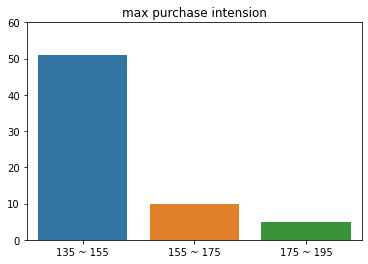

In [30]:


x = [x[0] for x in max_price_intension_list]
y = [x[1] for x in max_price_intension_list]
sns.barplot(x=x, y=y)
plt.title('max purchase intension')
plt.yticks(np.arange(0, 61, 10))
print(max_price_intension_list)
plt.show()

In [31]:
apple = df[df['Manufacturer'] == 0]
samsung = df[df['Manufacturer'] == 1]

apple.reset_index(inplace=True)
apple.drop(columns = 'index', inplace=True)
samsung.reset_index(inplace=True)
samsung.drop(columns = 'index', inplace=True)

/Users/hansuho/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[('135 ~ 155', 28), ('155 ~ 175', 8), ('175 ~ 195', 2)]


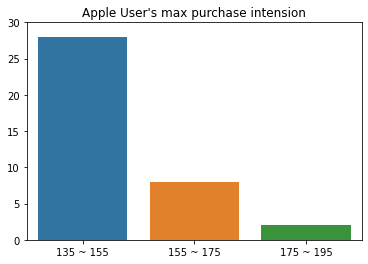


[('135 ~ 155', 23), ('155 ~ 175', 2), ('175 ~ 195', 3)]


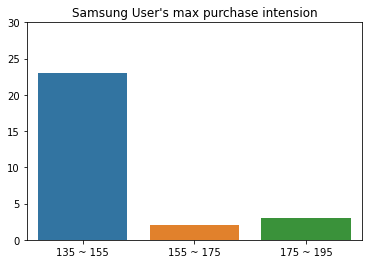

In [32]:
max_price_intension_list_a = dict(collections.Counter(apple.max_price_intension))
max_price_intension_list_a = sorted(max_price_intension_list_a.items())

max_price_intension_list_s = dict(collections.Counter(samsung.max_price_intension))
max_price_intension_list_s = sorted(max_price_intension_list_s.items())


x_a = [x[0] for x in max_price_intension_list_a]
y_a = [x[1] for x in max_price_intension_list_a]
sns.barplot(x=x_a, y=y_a)
plt.title("Apple User's max purchase intension")
plt.yticks(np.arange(0, 31, 5))
print(max_price_intension_list_a)
plt.show()
print()

x_s = [x[0] for x in max_price_intension_list_s]
y_s = [x[1] for x in max_price_intension_list_s]
sns.barplot(x=x_s, y=y_s)
plt.title("Samsung User's max purchase intension")
plt.yticks(np.arange(0, 31, 5))
print(max_price_intension_list_s)
plt.show()

In [33]:
design_group = df[df['satisfying_factor'] == "디자인"]
perform_group = df[df['satisfying_factor'] == "성능"]

In [34]:
len(design_group), len(perform_group)

(21, 12)

In [35]:
design_group.fordable_intension.mean(), perform_group.fordable_intension.mean(), 

(2.380952380952381, 2.9166666666666665)

In [36]:
collections.Counter(design_group['max_price_intension'])

Counter({'135 ~ 155': 15, '155 ~ 175': 4, '175 ~ 195': 2})

In [37]:
collections.Counter(perform_group['max_price_intension'])

Counter({'135 ~ 155': 11, '155 ~ 175': 1})

In [38]:
corr = df.corr(method='pearson')

피어슨의 상관계수는 일반적으로,

  값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계

  값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계

  값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계

  값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계

  값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계

  값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계

  값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계


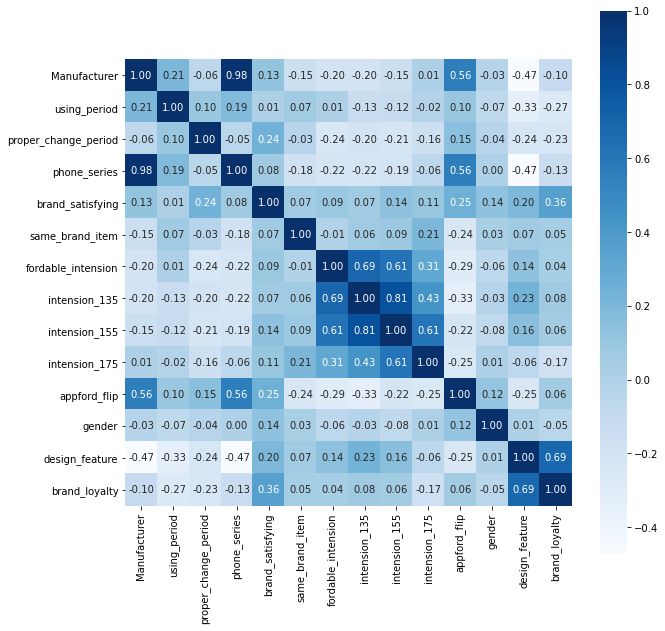

In [39]:
plt.figure(figsize=(10, 10))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')

plt.show()

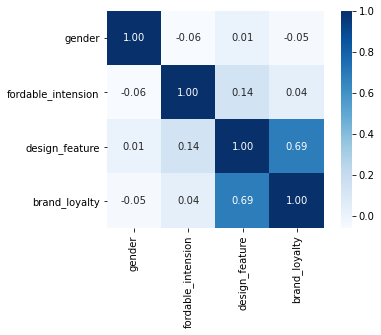

In [40]:
corr_loyalty = df[['gender','fordable_intension', 'design_feature', 'brand_loyalty', 'max_price_intension']].corr(method='pearson')
loyalty_heatmap = sns.heatmap(corr_loyalty, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')
plt.show()

In [41]:
brand_loyalty_count = collections.Counter(df.brand_loyalty)
item = list(brand_loyalty_count.items())
keys = list(brand_loyalty_count.keys())

In [42]:
item.sort(key=lambda x: x[0])

In [43]:
tmp = 0
for e, i in enumerate(item):
    tmp += i[1]
    item[e] = (i[0], i[1], str(round((tmp/len(df))*100, 2))+"%")

In [44]:
item

[(1.0, 1, '1.52%'),
 (1.17, 1, '3.03%'),
 (3.33, 1, '4.55%'),
 (3.5, 2, '7.58%'),
 (3.67, 1, '9.09%'),
 (4.0, 7, '19.7%'),
 (4.17, 1, '21.21%'),
 (4.33, 1, '22.73%'),
 (4.5, 2, '25.76%'),
 (4.67, 1, '27.27%'),
 (5.0, 5, '34.85%'),
 (5.17, 2, '37.88%'),
 (5.33, 6, '46.97%'),
 (5.5, 3, '51.52%'),
 (5.67, 3, '56.06%'),
 (5.83, 4, '62.12%'),
 (6.0, 3, '66.67%'),
 (6.17, 5, '74.24%'),
 (6.33, 1, '75.76%'),
 (6.5, 2, '78.79%'),
 (6.67, 3, '83.33%'),
 (6.83, 3, '87.88%'),
 (7.0, 8, '100.0%')]

In [47]:
df['purchase_reason'].unique()

array(['주변 IT 기기와의 호환성 (7-1번 질문으로 이동하십시오)', '성능', '기존 사용 브랜드이기 때문에',
       '합리적인 가격', '디자인', '책을 읽기에 좋아서', '기존 사용제품의 고장, 임직원가족 할인 기회 '],
      dtype=object)

In [97]:
same_item_count = []
same_item_person = []
same_item_loyalty = []

for i in range(6):
    tmp = df[df['same_brand_item'] == i]
    if i == 5:
        tmp = tmp[:2]
    same_item_count.append(i)
    same_item_person.append(len(tmp))
    same_item_loyalty.append(round(tmp.brand_loyalty.mean(), 2))
    print(f"주변 IT기기 {i}대를 가진 응답자: {len(tmp)}")
    print(f"주변 IT기기 {i}대를 가진 응답자들의 브랜드 충성도 평균: {round(tmp.brand_loyalty.mean(), 2)}")
    print()

주변 IT기기 0대를 가진 응답자: 18
주변 IT기기 0대를 가진 응답자들의 브랜드 충성도 평균: 5.29

주변 IT기기 1대를 가진 응답자: 13
주변 IT기기 1대를 가진 응답자들의 브랜드 충성도 평균: 5.15

주변 IT기기 2대를 가진 응답자: 15
주변 IT기기 2대를 가진 응답자들의 브랜드 충성도 평균: 5.28

주변 IT기기 3대를 가진 응답자: 13
주변 IT기기 3대를 가진 응답자들의 브랜드 충성도 평균: 5.99

주변 IT기기 4대를 가진 응답자: 4
주변 IT기기 4대를 가진 응답자들의 브랜드 충성도 평균: 6.21

주변 IT기기 5대를 가진 응답자: 2
주변 IT기기 5대를 가진 응답자들의 브랜드 충성도 평균: 5.08



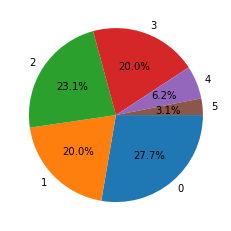

[18, 13, 15, 13, 4, 2]


In [99]:
plt.pie(same_item_person, labels=same_item_count, autopct='%.1f%%', counterclock=False)
plt.show()
print(same_item_person)

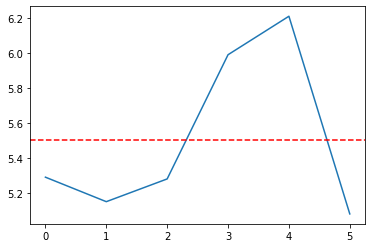

In [113]:
sns.lineplot(x=same_item_count, y=same_item_loyalty)
plt.axhline(5.5, color='r', linestyle='--')